In [1]:
# loading all the pre-defined function definition (or simply run the last cell of this notebook)
%run portfolio_analysis_functions.py
warnings.filterwarnings('ignore')

In [2]:
# Set date range
end_date = datetime.now().replace(tzinfo=None)

# 3.5 years of data 
# First 3 years for portfolio construction and the last 6 months reserved for backtesting
start_date = end_date - timedelta(days=int(3.5*365))

# Define the cutoff for portfolio construction analysis
analysis_end_date = end_date - timedelta(days=int(0.5*365))  # 6 months before end_date
analysis_start_date = start_date 

In [3]:
# Define two sets of tickers
diversified_tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META',  # Tech
    'JPM', 'BAC', 'GS', 'MS', 'WFC',          # Finance
    'JNJ', 'PFE', 'MRK', 'UNH', 'ABBV',       # Healthcare
    'XOM', 'CVX', 'COP', 'SLB', 'EOG',        # Energy
    'PG', 'KO', 'PEP', 'WMT', 'COST'          # Consumer Staples
]

# Tech-only tickers
tech_tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'NVDA', 'TSLA',  # Big Tech
    'ADBE', 'CRM', 'ORCL', 'INTC', 'AMD', 'AVGO', 'QCOM', 'CSCO', 'IBM', 'TXN', 'AMAT', 'NOW', 'SHOP', 'UBER', 'SNOW', 'ZM', 'DOCU', 'PYPL', 'NFLX'  # More tech
]

# Portfolio Risk analysis for the basket diversified by sector

In [4]:
# Choose the class of stocks to use for portfolio analysis
tickers = diversified_tickers  # or tech_tickers

In [5]:
# Create four portfolios that are optimized according to a given risk tolerance, long + short portfolio composition
#    (1) low-risk long-only portfolio 
#    (2) low-risk long-short portfolio
#    (3) high-risk long-only portfolio 
#    (4) high-risk long-short portfolio 

portfolios, metrics, stock_metrics = create_portfolios(tickers, analysis_start_date, analysis_end_date, l2_reg=0.1)

In [6]:
# Here are the weights of the four portfolios built on the `diversified_tickers` universe of stocks
portfolios

,Low Risk Long Only,Low Risk Long-Short,High Risk Long Only,High Risk Long-Short
AAPL,0.010000,-0.020819,0.010000,0.111962
MSFT,0.012216,0.058668,0.010000,-0.037404
GOOGL,0.010330,0.037902,0.010000,-0.009148
AMZN,0.010000,-0.014968,0.010000,-0.023141
META,0.010000,0.001841,0.433672,0.200000
JPM,0.010000,0.043702,0.010000,0.200000
BAC,0.010000,-0.079898,0.010000,-0.200000
GS,0.010000,0.037100,0.010000,0.185608
MS,0.010000,0.005474,0.010000,0.018864
WFC,0.010000,0.027217,0.010000,0.196328


## Portfolio Visualizations

### Visualize portfolio allocations by stocks

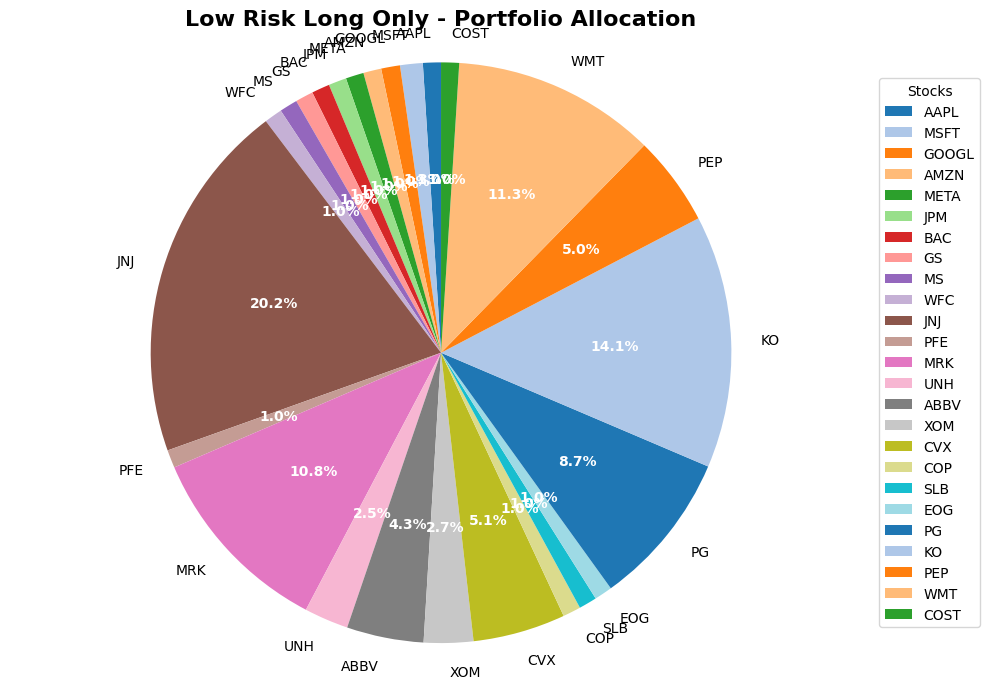

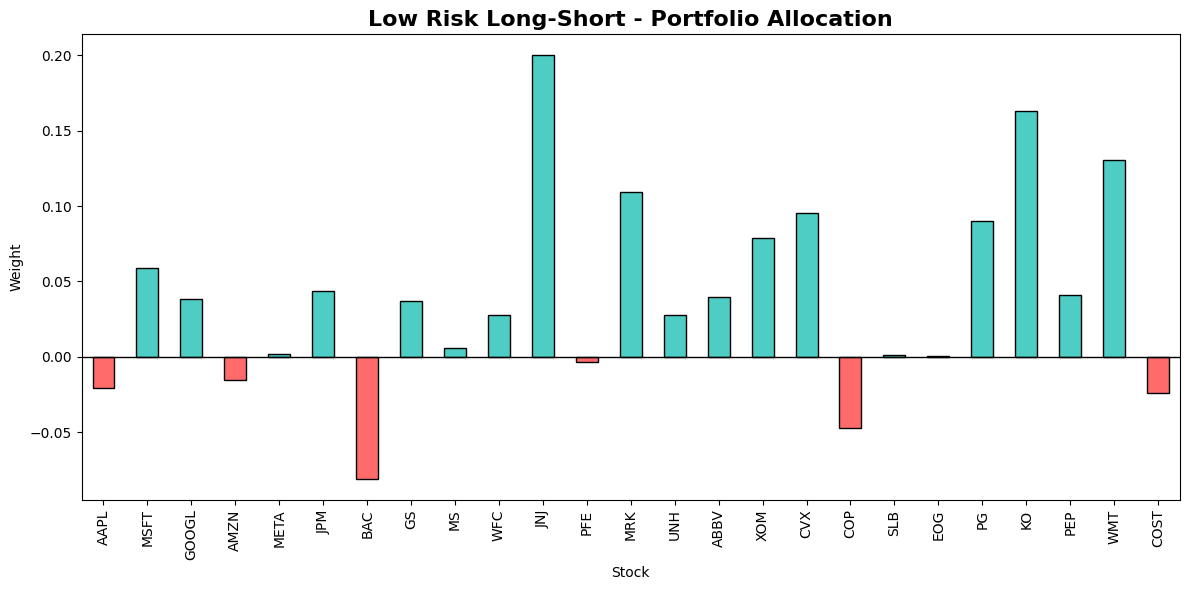

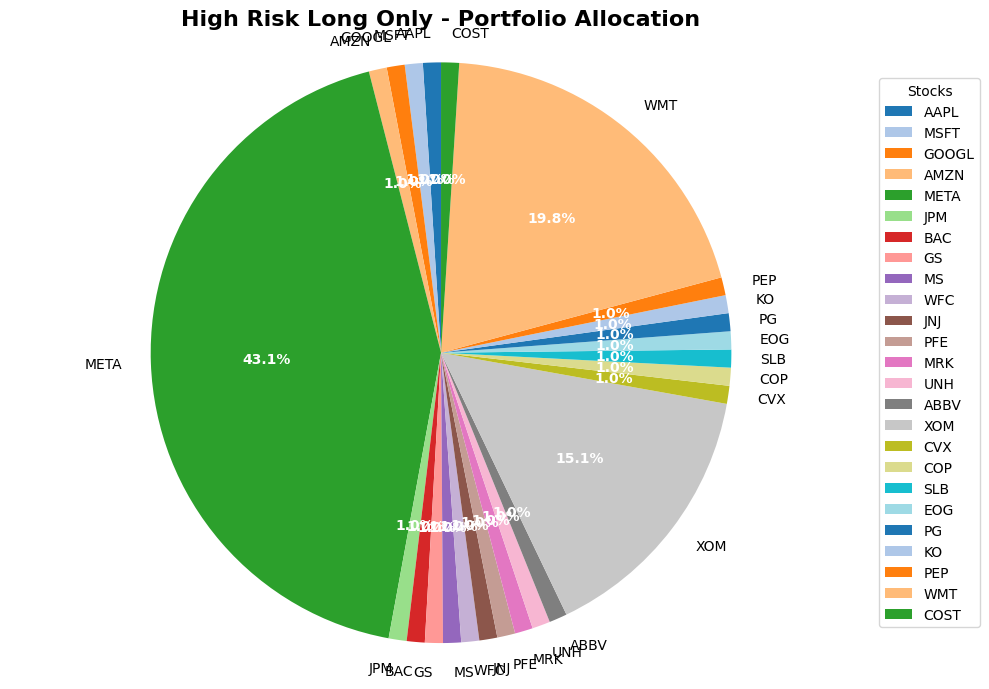

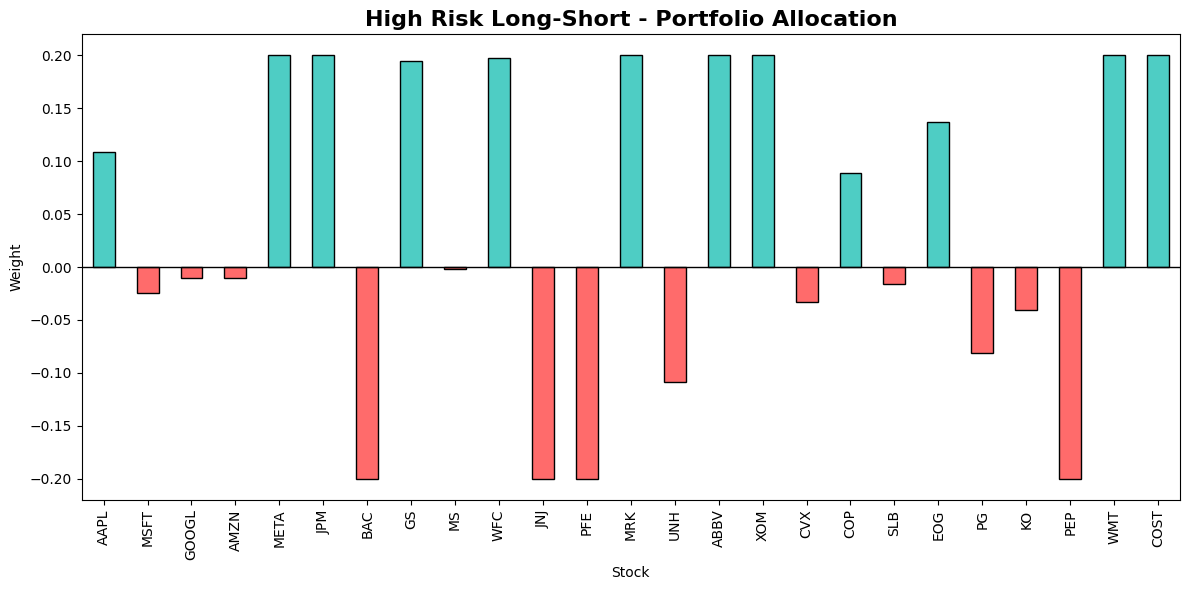

In [9]:
plot_portfolio_weights(portfolios)

### Visualize portfolio allocations by sector

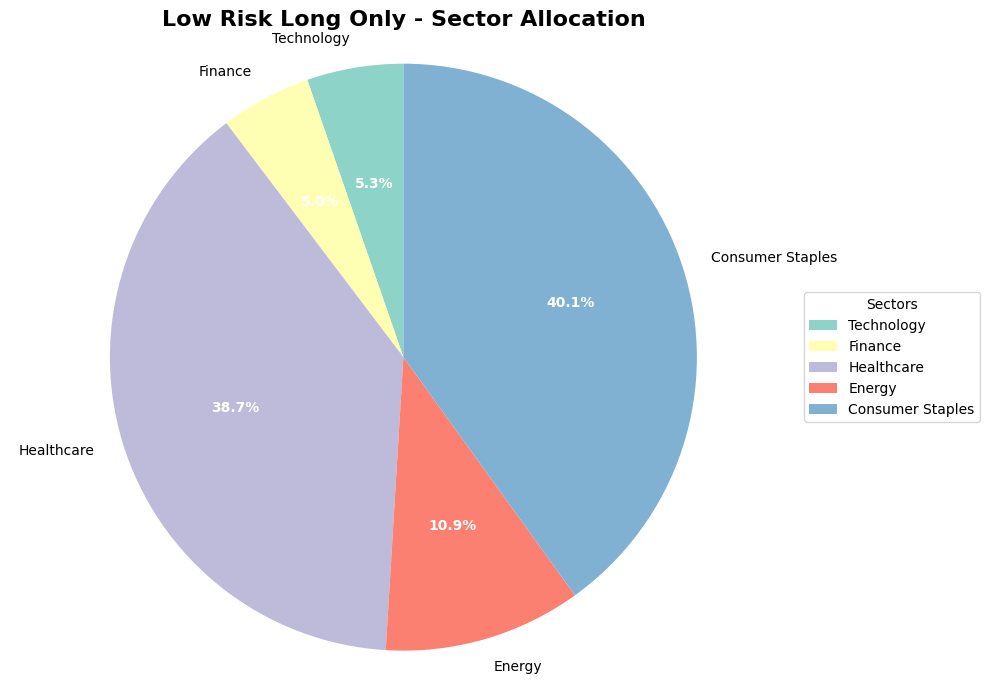

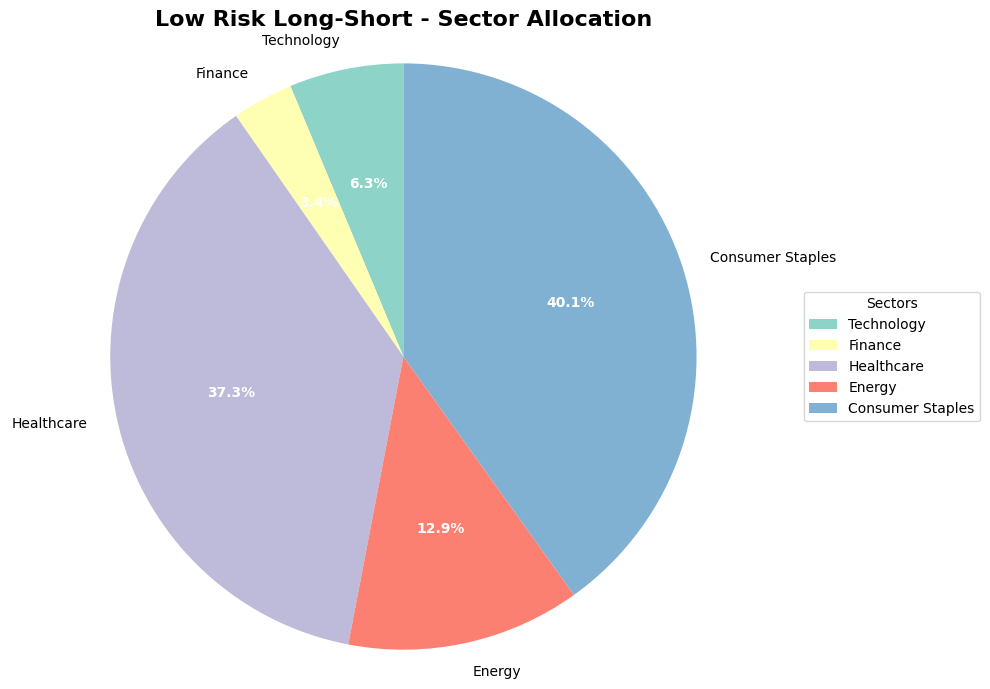

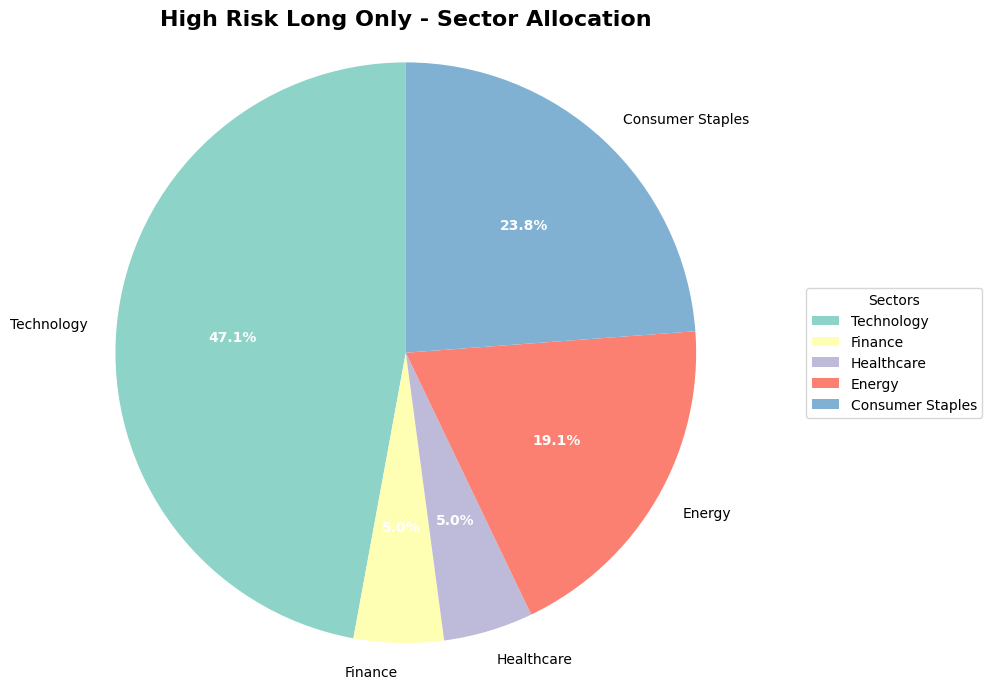

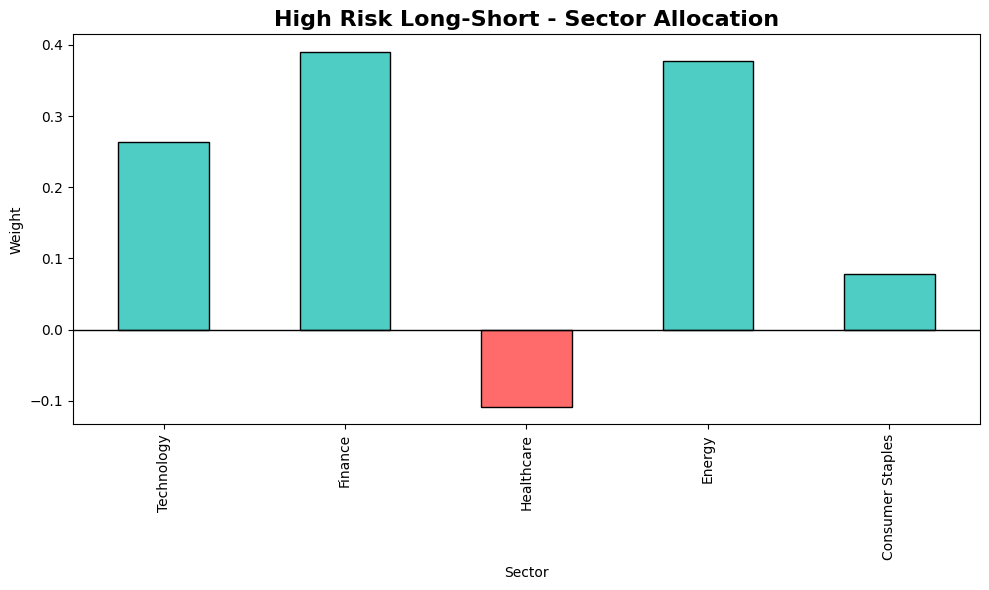

In [10]:
plot_portfolio_sector(portfolios)

## In-Sample Portfolio Characteristics

In [11]:
# Get returns data for the analysis period
prices = get_stock_data(tickers, analysis_start_date, analysis_end_date)
returns = calculate_returns(prices)

In [12]:
# Calculate annual returns for $100 investment for each portfolio
initial_investment = 100
for name in portfolios.columns:
    ann = calculate_annual_returns(returns, portfolios[name], initial_investment)
    sharpe_ratio = (ann['annual_return'] - 0.025) / ann['annual_volatility']
    print(f"\nAnnual Return Projections for {name} (Based on $100 investment):")
    print(f"Expected Annual Return: {ann['annual_return']*100:.2f}%")
    print(f"Annual Volatility: {ann['annual_volatility']*100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Expected Value after 1 year: ${ann['expected_value']:.2f}")
    print(f"95% Confidence Interval: ${ann['confidence_interval'][0]:.2f} - ${ann['confidence_interval'][1]:.2f}")


Annual Return Projections for Low Risk Long Only (Based on $100 investment):
Expected Annual Return: 10.30%
Annual Volatility: 11.90%
Sharpe Ratio: 0.66
Expected Value after 1 year: $110.30
95% Confidence Interval: $87.79 - $139.96

Annual Return Projections for Low Risk Long-Short (Based on $100 investment):
Expected Annual Return: 11.67%
Annual Volatility: 11.70%
Sharpe Ratio: 0.78
Expected Value after 1 year: $111.67
95% Confidence Interval: $89.34 - $141.35

Annual Return Projections for High Risk Long Only (Based on $100 investment):
Expected Annual Return: 25.05%
Annual Volatility: 24.66%
Sharpe Ratio: 0.91
Expected Value after 1 year: $125.05
95% Confidence Interval: $79.23 - $208.30

Annual Return Projections for High Risk Long-Short (Based on $100 investment):
Expected Annual Return: 44.96%
Annual Volatility: 25.00%
Sharpe Ratio: 1.70
Expected Value after 1 year: $144.96
95% Confidence Interval: $96.04 - $255.89


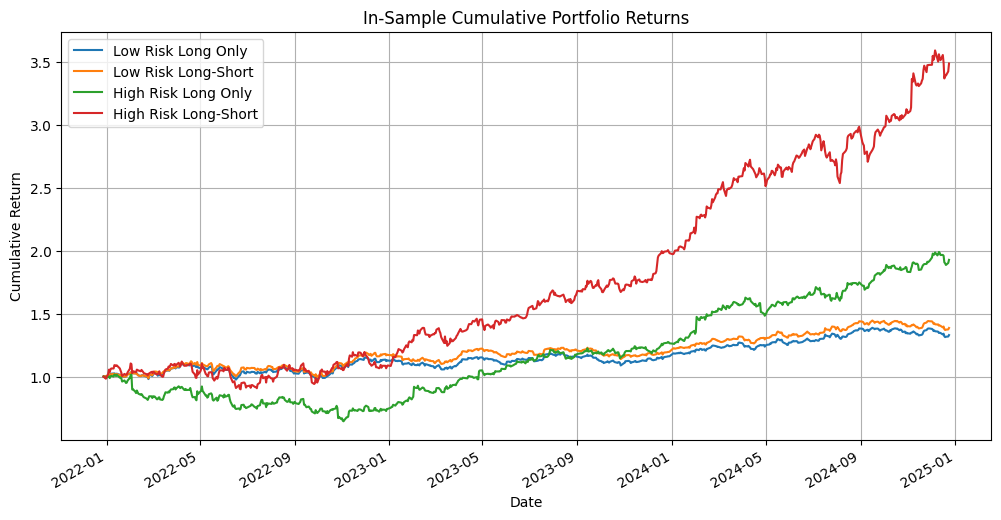

In [13]:
plt.figure(figsize=(12, 6))
for name in portfolios.columns:
    portfolio_return = returns.dot(portfolios[name])
    (1 + portfolio_return).cumprod().plot(label=name)
plt.title('In-Sample Cumulative Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

## Backtesting (on the last six month stock data)

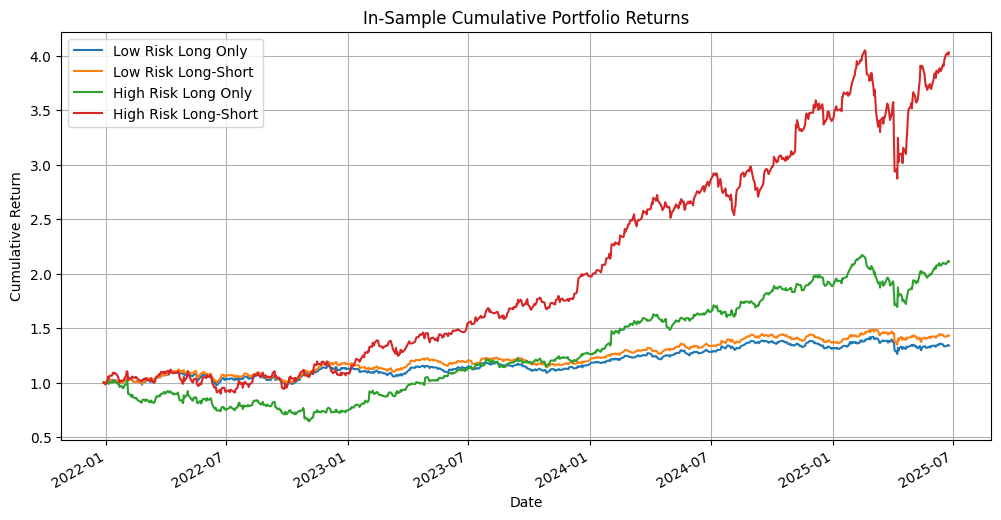

In [20]:
# Let us see how the cumulative return profile looks like for the entire 3.5 years range (3 yrs of training period + 6 months of testing period)
prices = get_stock_data(tickers, start_date, end_date)
returns = calculate_returns(prices)

plt.figure(figsize=(12, 6))
for name in portfolios.columns:
    portfolio_return = returns.dot(portfolios[name])
    (1 + portfolio_return).cumprod().plot(label=name)
plt.title('In-Sample Cumulative Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

Below we analyse the portfolios on the last six months of stock data

In [21]:
# Define the Backtest Period
backtest_start_date = analysis_end_date
backtest_end_date = end_date

# Fetch Backtest Data
backtest_prices = get_stock_data(tickers, backtest_start_date, backtest_end_date)
backtest_returns = calculate_returns(backtest_prices)

In [22]:
# Apply portfolio weights to backtest data and see how the portfolio characteristics change on out of sample data
for name in portfolios.columns:
    weights = portfolios[name]
    backtest_portfolio_returns = backtest_returns.dot(weights)
    cumulative_return = (1 + backtest_portfolio_returns).prod() - 1
    annualized_return = backtest_portfolio_returns.mean() * 252
    annualized_volatility = backtest_portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = ((annualized_return) - 0.025) / (annualized_volatility)
    print(f"\nBacktest Results for {name}:")
    print(f"Cumulative Return: {cumulative_return:.2%}")
    print(f"Annualized Return: {annualized_return:.2%}")
    print(f"Annualized Volatility: {annualized_volatility:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2}")


Backtest Results for Low Risk Long Only:
Cumulative Return: 0.71%
Annualized Return: 2.82%
Annualized Volatility: 16.47%
Sharpe Ratio: 0.019

Backtest Results for Low Risk Long-Short:
Cumulative Return: 3.15%
Annualized Return: 7.60%
Annualized Volatility: 15.54%
Sharpe Ratio: 0.33

Backtest Results for High Risk Long Only:
Cumulative Return: 9.77%
Annualized Return: 23.04%
Annualized Volatility: 27.72%
Sharpe Ratio: 0.74

Backtest Results for High Risk Long-Short:
Cumulative Return: 15.70%
Annualized Return: 37.56%
Annualized Volatility: 38.70%
Sharpe Ratio: 0.91


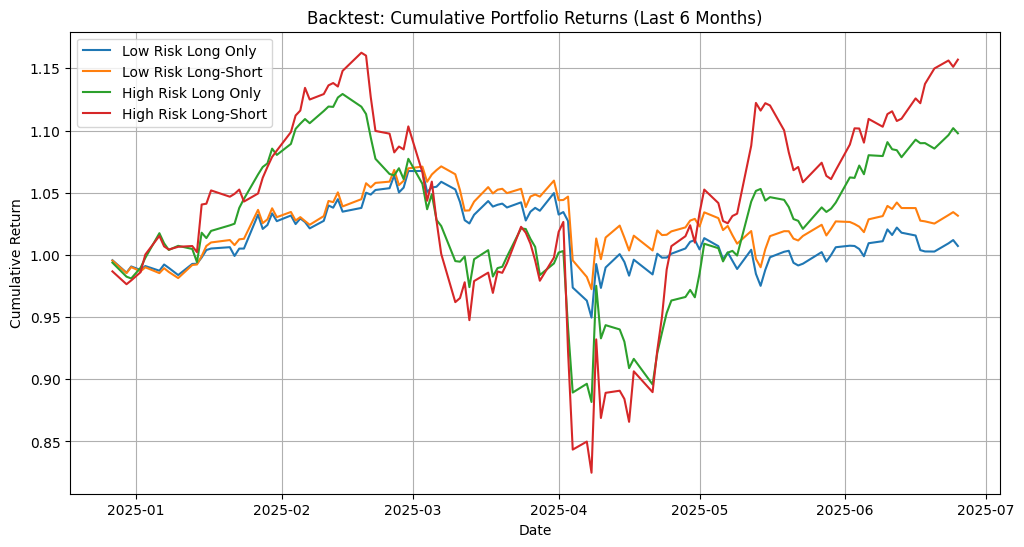

In [23]:
# Plot Cumulative Returns in the backtesting period
plt.figure(figsize=(12, 6))
for name in portfolios.columns:
    weights = portfolios[name]
    backtest_portfolio_returns = backtest_returns.dot(weights)
    cumulative = (1 + backtest_portfolio_returns).cumprod()
    plt.plot(cumulative, label=name)
plt.title('Backtest: Cumulative Portfolio Returns (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

## Forecasting 


Generating 6-month forecasts and overlaying actual realized paths...


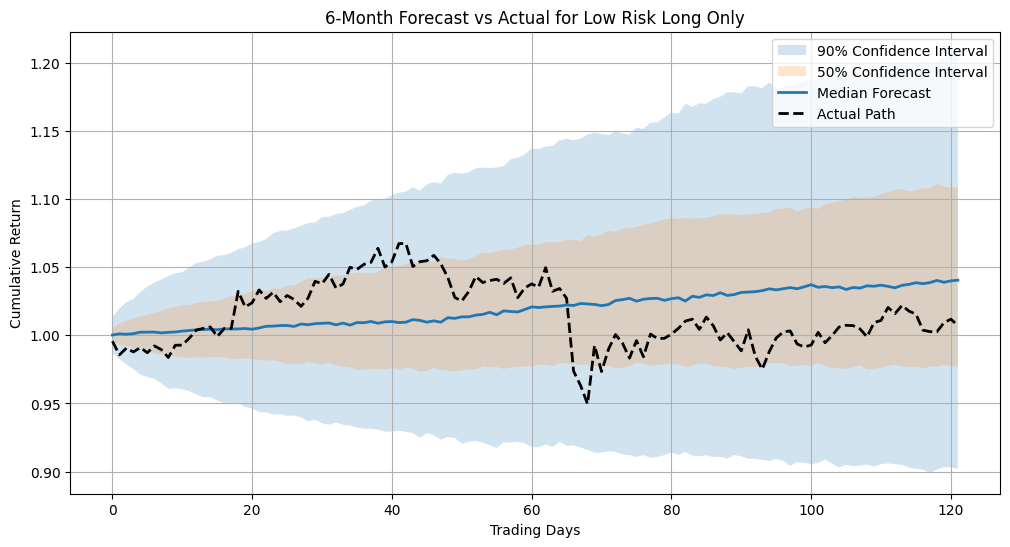

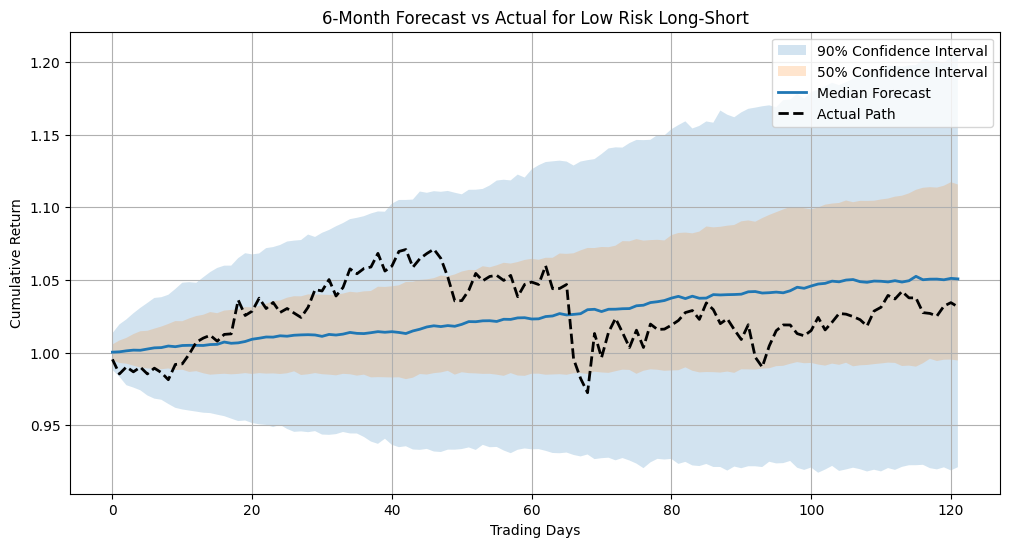

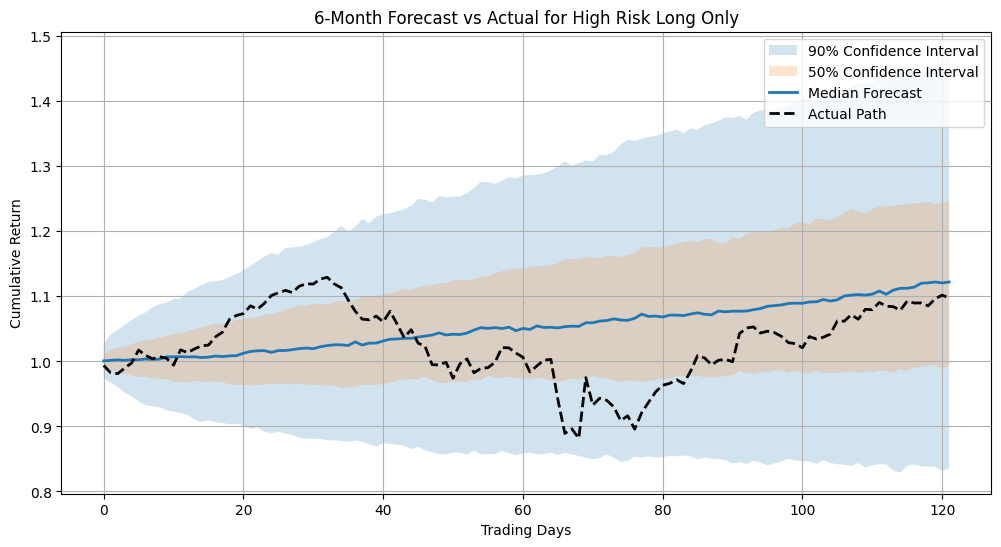

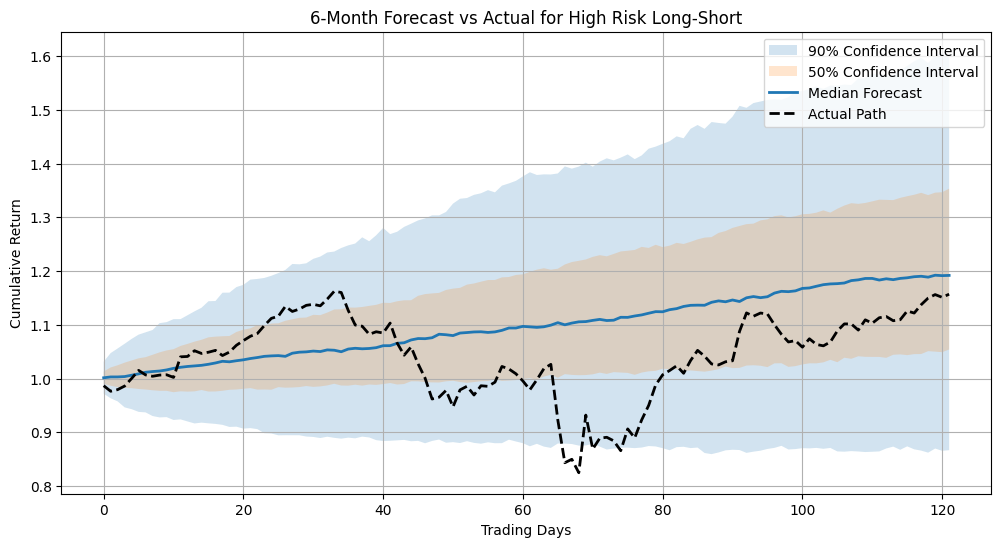

In [24]:
# Forecasting for the next 6 months and overlay actual path each portfolio took
print("\nGenerating 6-month forecasts and overlaying actual realized paths...")
# Define backtest period (last 6 months)
backtest_start_date = analysis_end_date
backtest_end_date = end_date
backtest_prices = get_stock_data(tickers, backtest_start_date, backtest_end_date)
backtest_returns = calculate_returns(backtest_prices)
n_days = len(backtest_returns)
for name in portfolios.columns:
    weights = portfolios[name]
    # Forecast for 6 months (use n_days to match actual path length)
    forecast = forecast_portfolio_returns(returns, weights, forecast_days=n_days)
    # Actual realized path in backtest period
    actual_portfolio_returns = backtest_returns.dot(weights)
    plot_forecast(forecast, actual_portfolio_returns, name)

# Portfolio analysis for the tech basket

In [4]:
# Choose the class of stocks to use for portfolio analysis
tickers = tech_tickers  # or diversified_tickers

In [5]:
# Create and analyze portfolios using only the first 3 years
# Create and analyze four portfolios
portfolios, metrics, stock_metrics = create_portfolios(
    tickers, analysis_start_date, analysis_end_date, l2_reg=0.1)

In [6]:
portfolios

,Low Risk Long Only,Low Risk Long-Short,High Risk Long Only,High Risk Long-Short
AAPL,0.021812,0.172106,0.010000,0.200000
MSFT,0.010000,0.200000,0.010000,0.079432
GOOGL,0.010000,0.076180,0.010000,0.101775
AMZN,0.010000,-0.013564,0.010000,0.021740
META,0.010000,-0.044067,0.010000,0.093809
NVDA,0.010000,-0.081233,0.116261,0.200000
TSLA,0.010000,-0.012931,0.010000,0.035519
ADBE,0.010000,-0.011675,0.010000,-0.190061
CRM,0.010000,0.046761,0.010000,0.115437
ORCL,0.031394,0.134973,0.080326,0.200000


In [12]:
portfolios['Low Risk Long Only'].to_dict()

{'AAPL': 0.021812453802044388,
 'MSFT': 0.010000000000000009,
 'GOOGL': 0.01,
 'AMZN': 0.010000000000000005,
 'META': 0.010000000000000004,
 'NVDA': 0.010000000006475891,
 'TSLA': 0.010000000000000005,
 'ADBE': 0.01,
 'CRM': 0.010000000000660708,
 'ORCL': 0.03139380706833694,
 'INTC': 0.01,
 'AMD': 0.010000000013316008,
 'AVGO': 0.010000000000000002,
 'QCOM': 0.01,
 'CSCO': 0.2650769281607079,
 'IBM': 0.4810085979380693,
 'TXN': 0.010000000000000002,
 'AMAT': 0.010000000008569309,
 'NOW': 0.010000000000000002,
 'SHOP': 0.01000000000676366,
 'UBER': 0.010000000001539899,
 'SNOW': 0.010000000000000005,
 'ZM': 0.010000000000000005,
 'DOCU': 0.010000000002015539,
 'PYPL': 0.01000000000000001,
 'NFLX': 0.01000000000000001}

In [14]:
portfolios['Low Risk Long-Short'].to_dict()

{'AAPL': 0.17210553372057874,
 'MSFT': 0.19999999999999948,
 'GOOGL': 0.07617976042632175,
 'AMZN': -0.013563717692230927,
 'META': -0.044067202606241695,
 'NVDA': -0.08123319609124961,
 'TSLA': -0.012931297455996835,
 'ADBE': -0.011675000715674753,
 'CRM': 0.04676128568806629,
 'ORCL': 0.13497283036307053,
 'INTC': -0.008985392704690787,
 'AMD': -0.06083042569540365,
 'AVGO': 0.030598811714695404,
 'QCOM': -0.027165699245987638,
 'CSCO': 0.19999999999999957,
 'IBM': 0.19999999999999973,
 'TXN': 0.19999999999999962,
 'AMAT': -0.049477630452988246,
 'NOW': -0.039573504926120204,
 'SHOP': -0.04997514714909841,
 'UBER': 0.07414305340299125,
 'SNOW': -0.014841654989623188,
 'ZM': 0.02546538842827643,
 'DOCU': -0.055269051211160526,
 'PYPL': 0.048038262736871444,
 'NFLX': 0.061323994477113744}

In [9]:
portfolios['High Risk Long Only'].to_dict()

{'AAPL': 0.010000000000000142,
 'MSFT': 0.01,
 'GOOGL': 0.010000000000000132,
 'AMZN': 0.01,
 'META': 0.01,
 'NVDA': 0.11626076731695126,
 'TSLA': 0.01,
 'ADBE': 0.01,
 'CRM': 0.01,
 'ORCL': 0.0803258864424402,
 'INTC': 0.01,
 'AMD': 0.010000000000000023,
 'AVGO': 0.22440016727373968,
 'QCOM': 0.01000000000000016,
 'CSCO': 0.010000000000000071,
 'IBM': 0.3590131789668684,
 'TXN': 0.010000000000000099,
 'AMAT': 0.01000000000000019,
 'NOW': 0.01,
 'SHOP': 0.010000000000000092,
 'UBER': 0.01,
 'SNOW': 0.01000000000000016,
 'ZM': 0.010000000000000368,
 'DOCU': 0.010000000000000007,
 'PYPL': 0.010000000000000212,
 'NFLX': 0.01000000000000003}

In [8]:
portfolios['High Risk Long-Short'].to_dict()

{'AAPL': 0.2,
 'MSFT': 0.07943172620280746,
 'GOOGL': 0.10177491129918559,
 'AMZN': 0.021739749318436932,
 'META': 0.09380887112482013,
 'NVDA': 0.19999999999999993,
 'TSLA': 0.03551861269002139,
 'ADBE': -0.19006105377277493,
 'CRM': 0.115436581471451,
 'ORCL': 0.2,
 'INTC': -0.15236959088287885,
 'AMD': -0.19933860180204369,
 'AVGO': 0.2,
 'QCOM': -0.140392912687034,
 'CSCO': 0.2,
 'IBM': 0.2,
 'TXN': 0.2,
 'AMAT': -0.12136133336635185,
 'NOW': 0.12113943159746272,
 'SHOP': -0.004942146965349801,
 'UBER': 0.15558552949751772,
 'SNOW': -0.09841656901136019,
 'ZM': -0.1415822793511692,
 'DOCU': -0.062227613579616516,
 'PYPL': -0.13437355444978785,
 'NFLX': 0.12063024266666338}

## Portfolio Visualizations

### Visualize portfolio allocations by stocks

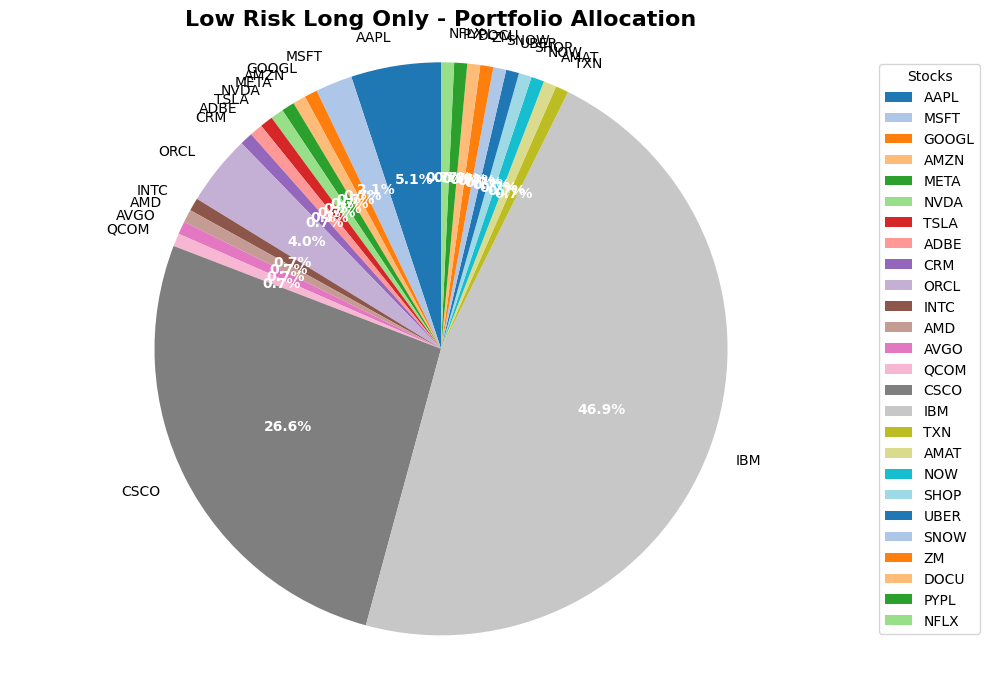

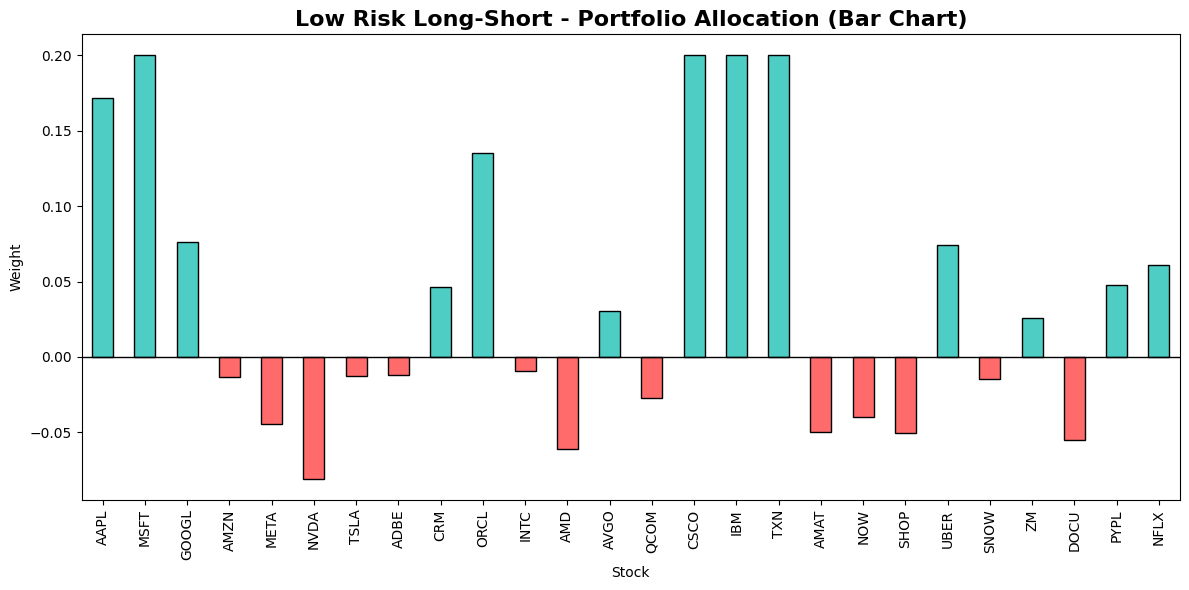

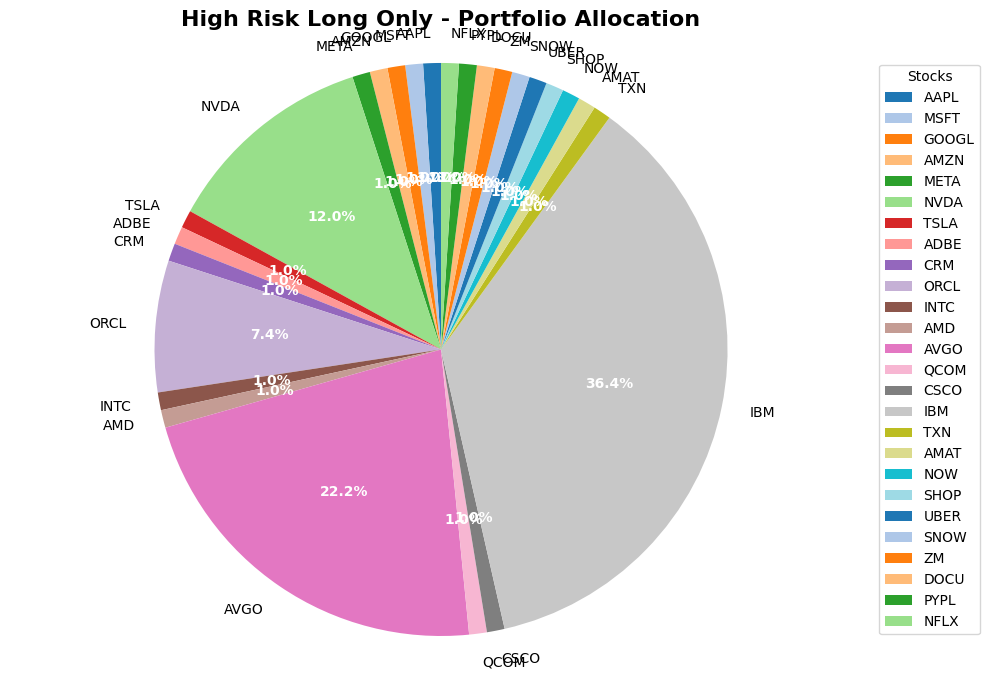

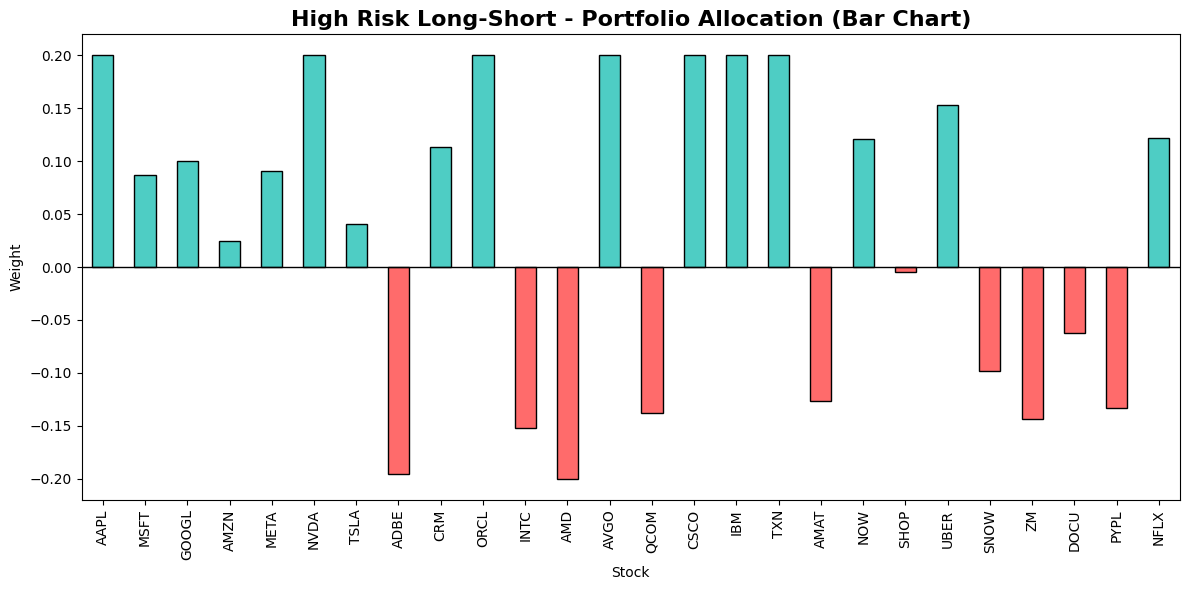

In [7]:
plot_portfolio_weights(portfolios)

## In-Sample Portfolio Characteristics

In [8]:
# Get returns data for the analysis period
prices = get_stock_data(tickers, analysis_start_date, analysis_end_date)
returns = calculate_returns(prices)

In [9]:
# Calculate annual returns for $100 investment for each portfolio
initial_investment = 100
for name in portfolios.columns:
    ann = calculate_annual_returns(returns, portfolios[name], initial_investment)
    sharpe_ratio = (ann['annual_return'] - 0.025) / ann['annual_volatility']
    print(f"\nAnnual Return Projections for {name} (Based on $100 investment):")
    print(f"Expected Annual Return: {ann['annual_return']*100:.2f}%")
    print(f"Annual Volatility: {ann['annual_volatility']*100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Expected Value after 1 year: ${ann['expected_value']:.2f}")
    print(f"95% Confidence Interval: ${ann['confidence_interval'][0]:.2f} - ${ann['confidence_interval'][1]:.2f}")


Annual Return Projections for Low Risk Long Only (Based on $100 investment):
Expected Annual Return: 23.13%
Annual Volatility: 25.22%
Sharpe Ratio: 0.82
Expected Value after 1 year: $123.13
95% Confidence Interval: $76.87 - $206.61

Annual Return Projections for Low Risk Long-Short (Based on $100 investment):
Expected Annual Return: 12.02%
Annual Volatility: 16.68%
Sharpe Ratio: 0.57
Expected Value after 1 year: $112.02
95% Confidence Interval: $81.32 - $156.39

Annual Return Projections for High Risk Long Only (Based on $100 investment):
Expected Annual Return: 32.82%
Annual Volatility: 25.00%
Sharpe Ratio: 1.21
Expected Value after 1 year: $132.82
95% Confidence Interval: $85.06 - $226.63

Annual Return Projections for High Risk Long-Short (Based on $100 investment):
Expected Annual Return: 63.06%
Annual Volatility: 25.00%
Sharpe Ratio: 2.42
Expected Value after 1 year: $163.06
95% Confidence Interval: $115.10 - $306.68


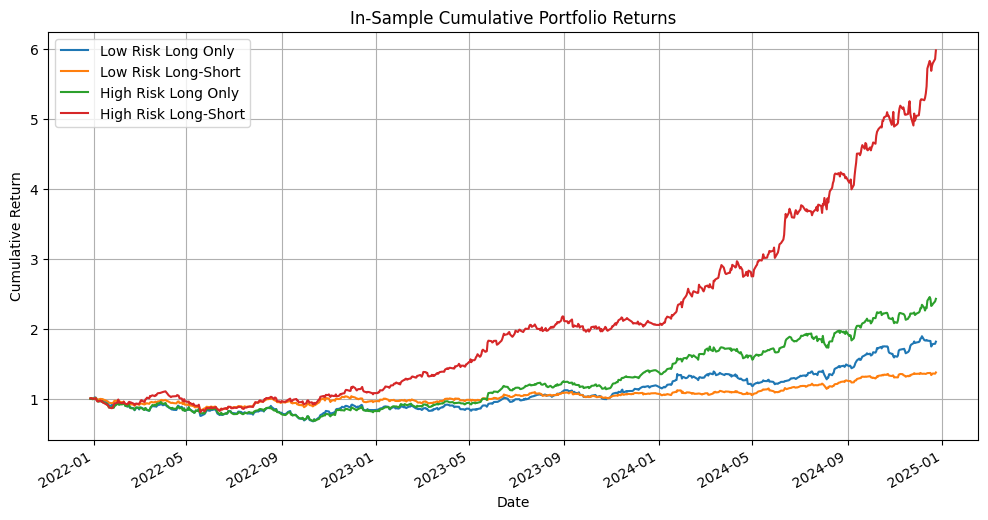

In [10]:
plt.figure(figsize=(12, 6))
for name in portfolios.columns:
    portfolio_return = returns.dot(portfolios[name])
    (1 + portfolio_return).cumprod().plot(label=name)
plt.title('In-Sample Cumulative Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

## Backtesting (on the last six months of stocks data)

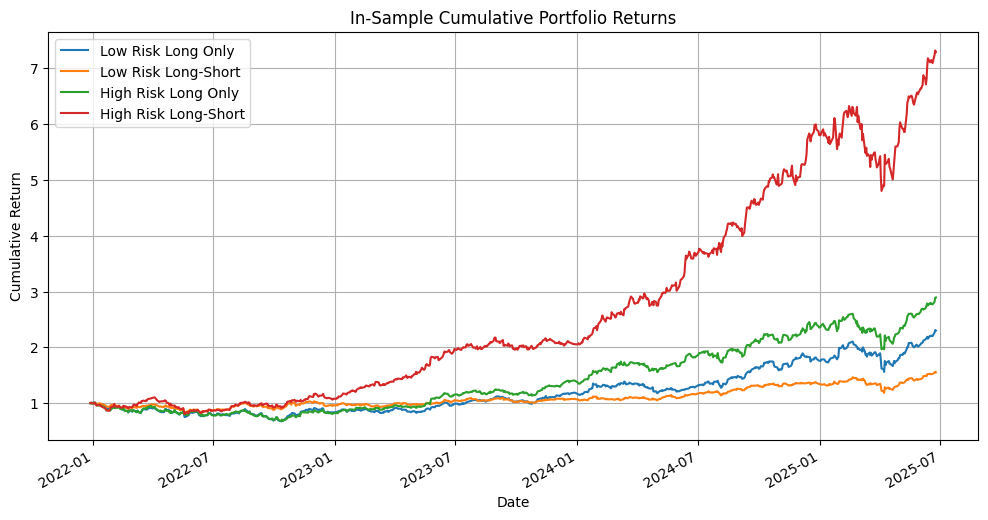

In [11]:
# Let us see how the cumulative return profile looks like for the entire 3.5 years range (3 yrs of training period + 6 months of testing period)
prices = get_stock_data(tickers, start_date, end_date)
returns = calculate_returns(prices)

plt.figure(figsize=(12, 6))
for name in portfolios.columns:
    portfolio_return = returns.dot(portfolios[name])
    (1 + portfolio_return).cumprod().plot(label=name)
plt.title('In-Sample Cumulative Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Define the Backtest Period
backtest_start_date = analysis_end_date
backtest_end_date = end_date

# Fetch Backtest Data
backtest_prices = get_stock_data(tickers, backtest_start_date, backtest_end_date)
backtest_returns = calculate_returns(backtest_prices)

In [13]:
# Apply Portfolio Weights to Backtest Data
for name in portfolios.columns:
    weights = portfolios[name]
    backtest_portfolio_returns = backtest_returns.dot(weights)
    cumulative_return = (1 + backtest_portfolio_returns).prod() - 1
    annualized_return = backtest_portfolio_returns.mean() * 252
    annualized_volatility = backtest_portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = ((annualized_return) - 0.025) / (annualized_volatility)
    print(f"\nBacktest Results for {name}:")
    print(f"Cumulative Return: {cumulative_return:.2%}")
    print(f"Annualized Return: {annualized_return:.2%}")
    print(f"Annualized Volatility: {annualized_volatility:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2}")


Backtest Results for Low Risk Long Only:
Cumulative Return: 26.54%
Annualized Return: 55.57%
Annualized Volatility: 37.55%
Sharpe Ratio: 1.4

Backtest Results for Low Risk Long-Short:
Cumulative Return: 12.89%
Annualized Return: 27.95%
Annualized Volatility: 24.27%
Sharpe Ratio: 1.0

Backtest Results for High Risk Long Only:
Cumulative Return: 18.59%
Annualized Return: 41.79%
Annualized Volatility: 36.52%
Sharpe Ratio: 1.1

Backtest Results for High Risk Long-Short:
Cumulative Return: 21.61%
Annualized Return: 47.77%
Annualized Volatility: 38.49%
Sharpe Ratio: 1.2


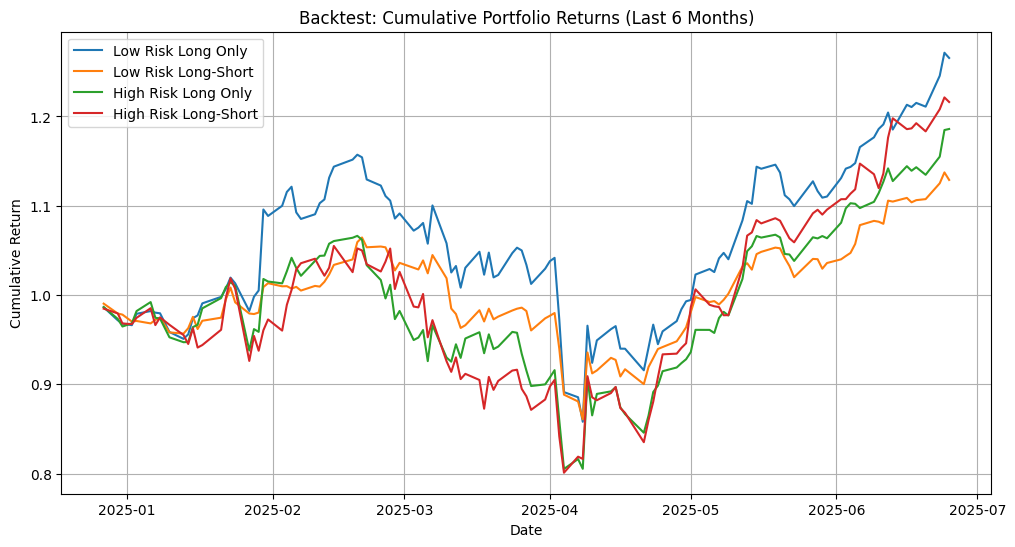

In [14]:
# Plot Cumulative Returns
plt.figure(figsize=(12, 6))
for name in portfolios.columns:
    weights = portfolios[name]
    backtest_portfolio_returns = backtest_returns.dot(weights)
    cumulative = (1 + backtest_portfolio_returns).cumprod()
    plt.plot(cumulative, label=name)
plt.title('Backtest: Cumulative Portfolio Returns (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

## Forecasting 


Generating 6-month forecasts and overlaying actual realized paths...


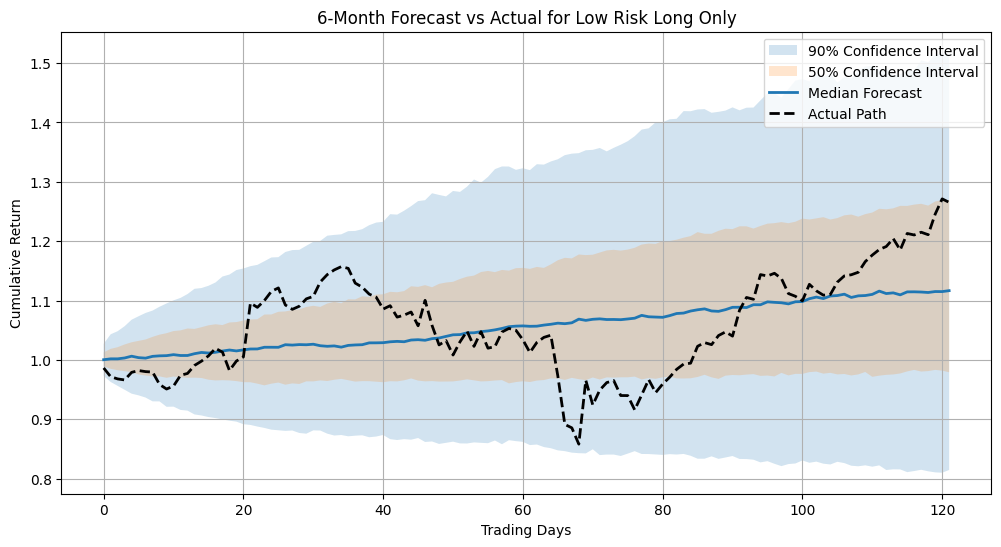

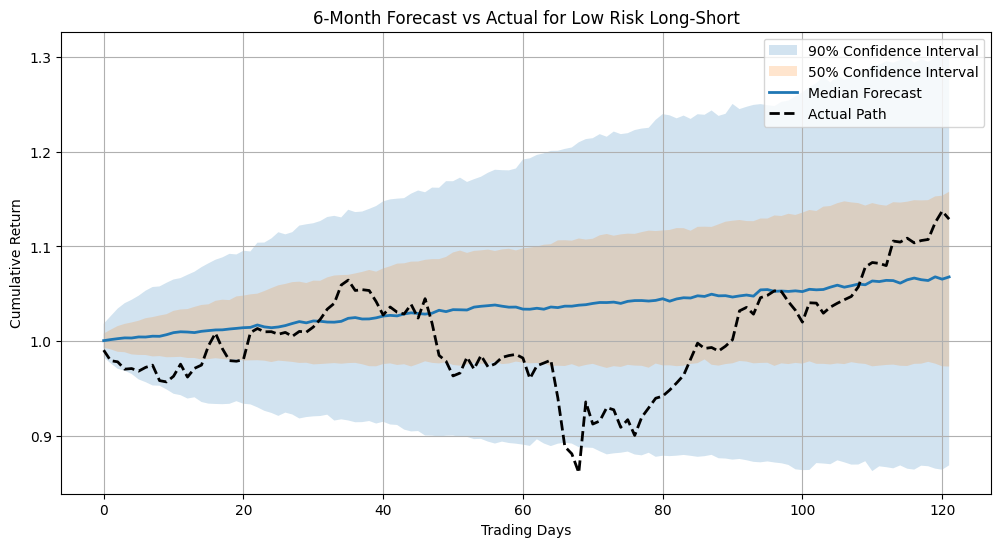

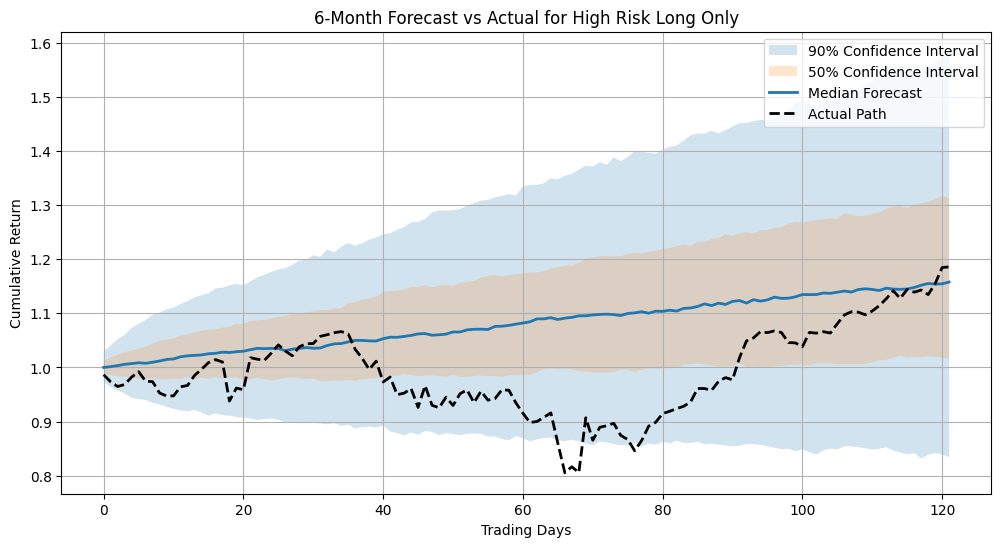

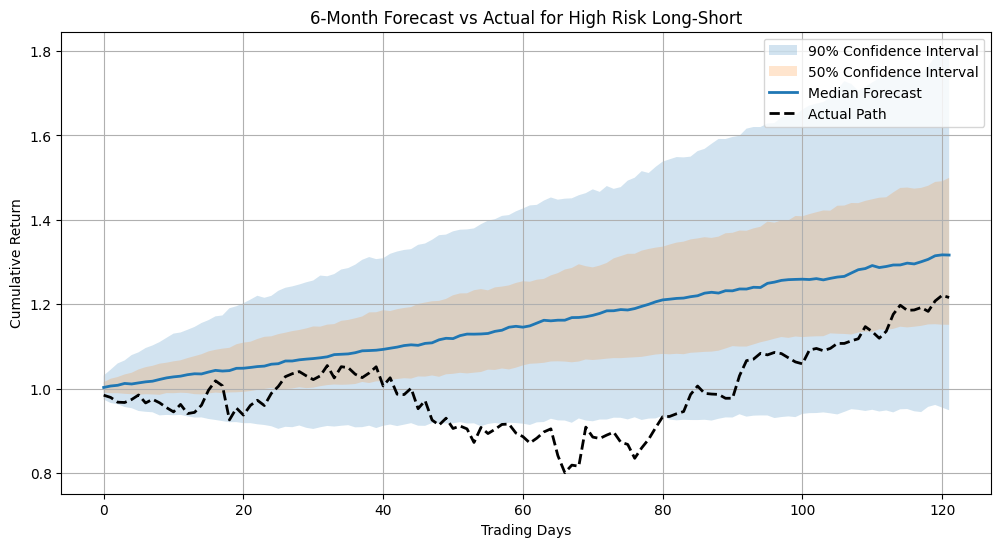

In [15]:
# Forecasting for the next 6 months and overlay actual path
print("\nGenerating 6-month forecasts and overlaying actual realized paths...")
# Define backtest period (last 6 months)
backtest_start_date = analysis_end_date
backtest_end_date = end_date
backtest_prices = get_stock_data(tickers, backtest_start_date, backtest_end_date)
backtest_returns = calculate_returns(backtest_prices)
n_days = len(backtest_returns)
for name in portfolios.columns:
    weights = portfolios[name]
    # Forecast for 6 months (use n_days to match actual path length)
    forecast = forecast_portfolio_returns(returns, weights, forecast_days=n_days)
    # Actual realized path in backtest period
    actual_portfolio_returns = backtest_returns.dot(weights)
    plot_forecast(forecast, actual_portfolio_returns, name)

# Codebase

This section contains all the function definitions needed to run the analysis above. 
It is the content of the `portfolio_analysis_functions.py` file

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from datetime import datetime, timedelta
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

def get_stock_data(tickers, start_date, end_date):
    """
    Fetch historical stock data for multiple tickers.
    Returns a DataFrame with closing prices.
    """
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            df = stock.history(start=start_date, end=end_date)
            if df.index.tz is not None:
                df.index = df.index.tz_localize(None)
            data[ticker] = df['Close']
        except Exception as e:
            print(f"Error fetching data for {ticker}: {str(e)}")
    return data

def calculate_returns(prices):
    """
    Calculate daily returns from price data.
    We use simple returns r_t = P_t/P_{t-1}-1 for portfolio analysis
    """
    return prices.pct_change().dropna()

def calculate_portfolio_metrics(returns, weights):
    """
    Calculate portfolio metrics including expected return, volatility, and Sharpe ratio.

    Input: Pandas dataframe consisting of daily returns of all the stocks in the portfolio.
    Input: Weights of the portfolio.

    Output: Dictionary of portfolio metrics: expected_return, volatility, sharpe_ratio
    """
    # Expected annual return
    expected_return = np.sum(returns.mean() * weights) * 252
    
    # Portfolio volatility (annualized)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    
    # average 3-month US Treasury bill rate from December 2020 to June 2024 
    # (note that there was huge variation in the risk-free interest rate from nrear 0% in 2020–2021 due to pandemic-era monetary policy to 4–5% in 2023–2024)
    # source: https://ycharts.com/indicators/3_month_t_bill
    risk_free_rate = 0.025

    # Sharpe ratio (assuming risk-free rate of 0.025)
    sharpe_ratio = (expected_return - risk_free_rate) / portfolio_volatility
    
    return {
        'expected_return': expected_return,
        'volatility': portfolio_volatility,
        'sharpe_ratio': sharpe_ratio
    }

def optimize_portfolio(returns, max_volatility=0.15, allow_short=False, l2_reg=0.1):
    """
    Maximize expected return subject to portfolio volatility being below max_volatility,
    with L2 regularization to encourage diversification.
    Returns the optimal weights.
    l2_reg: regularization strength (higher = more diversification)
    """
    n_assets = len(returns.columns)
    
    def objective(weights):
        # Negative expected return + L2 penalty
        return -np.sum(returns.mean() * weights) * 252 + l2_reg * np.sum(weights**2)
    
    def volatility_constraint(weights):
        # Annualized portfolio volatility
        cov_matrix = returns.cov() * 252
        port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return max_volatility - port_vol
    
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # weights sum to 1
        {'type': 'ineq', 'fun': volatility_constraint}   # volatility <= max_volatility
    ]
    if allow_short:
        bounds = tuple((-0.2, 0.2) for _ in range(n_assets))
    else:
        bounds = tuple((0.01, None) for _ in range(n_assets))
    initial_weights = np.array([1/n_assets] * n_assets)
    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

def create_portfolios(tickers, start_date, end_date, l2_reg=0.1):
    """
    Create and analyze four portfolios:
    (low risk, long only), (low risk, long-short), (high risk, long only), (high risk, long-short)
    Returns a dictionary of portfolios and their metrics.
    """
    prices = get_stock_data(tickers, start_date, end_date)
    returns = calculate_returns(prices)

    # Define risk levels (annualized volatility)
    low_risk_vol = 0.08
    high_risk_vol = 0.25

    # Optimize portfolios
    weights_low_long = optimize_portfolio(returns, max_volatility=low_risk_vol, allow_short=False, l2_reg=l2_reg)
    weights_low_short = optimize_portfolio(returns, max_volatility=low_risk_vol, allow_short=True, l2_reg=l2_reg)
    weights_high_long = optimize_portfolio(returns, max_volatility=high_risk_vol, allow_short=False, l2_reg=l2_reg)
    weights_high_short = optimize_portfolio(returns, max_volatility=high_risk_vol, allow_short=True, l2_reg=l2_reg)

    # Create portfolio DataFrames
    portfolios = pd.DataFrame({
        'Low Risk Long Only': weights_low_long,
        'Low Risk Long-Short': weights_low_short,
        'High Risk Long Only': weights_high_long,
        'High Risk Long-Short': weights_high_short
    }, index=tickers)

    # Calculate metrics for each portfolio
    metrics = {}
    for name, weights in portfolios.items():
        metrics[name] = calculate_portfolio_metrics(returns, weights)

    # Calculate individual stock metrics
    stock_metrics = pd.DataFrame({
        'Expected Return': returns.mean() * 252,
        'Volatility': returns.std() * np.sqrt(252),
        'Sharpe Ratio': (returns.mean() * 252 - 0.02) / (returns.std() * np.sqrt(252))
    })

    return portfolios, metrics, stock_metrics

def calculate_annual_returns(returns, weights, initial_investment=10000):
    """
    Calculate annual returns for a given investment amount.
    Uses log-normal confidence interval for more accurate bounds.
    """
    # Calculate portfolio returns
    portfolio_returns = returns.dot(weights)
    
    # Calculate annual metrics
    annual_return = portfolio_returns.mean() * 252
    annual_volatility = portfolio_returns.std() * np.sqrt(252)
    
    # Calculate expected value after one year
    expected_value = initial_investment * (1 + annual_return)
    
    # Calculate 95% confidence interval using log-normal formula
    lower_bound = initial_investment * np.exp(annual_return - 1.96 * annual_volatility)
    upper_bound = initial_investment * np.exp(annual_return + 1.96 * annual_volatility)
    
    return {
        'annual_return': annual_return,
        'annual_volatility': annual_volatility,
        'expected_value': expected_value,
        'confidence_interval': (lower_bound, upper_bound)
    }

def forecast_portfolio_returns(returns, weights, n_simulations=1000, forecast_days=252):
    """
    Forecast portfolio returns using Monte Carlo simulation.
    """
    # Calculate portfolio returns
    portfolio_returns = returns.dot(weights)
    
    # Calculate mean and standard deviation of returns
    mean_return = portfolio_returns.mean()
    std_return = portfolio_returns.std()
    
    # Generate simulations
    simulations = np.random.normal(
        mean_return,
        std_return,
        (n_simulations, forecast_days)
    )
    
    # Calculate cumulative returns
    cumulative_returns = (1 + simulations).cumprod(axis=1)
    
    # Calculate percentiles
    percentiles = np.percentile(cumulative_returns, [5, 25, 50, 75, 95], axis=0)
    
    return {
        'mean_return': mean_return,
        'std_return': std_return,
        'simulations': simulations,
        'cumulative_returns': cumulative_returns,
        'percentiles': percentiles
    }

def plot_forecast(forecast_results, actual_returns, title):
    """
    Plot forecast results with confidence intervals and overlay the actual realized path.
    """
    plt.figure(figsize=(12, 6))
    days = range(len(forecast_results['percentiles'][0]))
    # Plot forecast percentiles
    plt.fill_between(days, forecast_results['percentiles'][0], 
                     forecast_results['percentiles'][4], 
                     alpha=0.2, label='90% Confidence Interval')
    plt.fill_between(days, forecast_results['percentiles'][1], 
                     forecast_results['percentiles'][3], 
                     alpha=0.2, label='50% Confidence Interval')
    plt.plot(days, forecast_results['percentiles'][2], 
             label='Median Forecast', linewidth=2)
    # Plot actual realized path
    actual_cumulative = (1 + actual_returns).cumprod().values
    plt.plot(days[:len(actual_cumulative)], actual_cumulative, label='Actual Path', color='black', linewidth=2, linestyle='--')
    plt.title(f'6-Month Forecast vs Actual for {title}')
    plt.xlabel('Trading Days')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_portfolio_weights(portfolios):
    """
    Plot a pie chart of weights for each portfolio in the DataFrame if all weights are non-negative.
    Otherwise, use a bar chart for long-short portfolios.
    """
    for name in portfolios.columns:
        weights = portfolios[name]
        if (weights < 0).any():
            # Bar chart for long-short portfolios
            plt.figure(figsize=(12, 6))
            weights.plot(kind='bar', color=['#4ECDC4' if w >= 0 else '#FF6B6B' for w in weights], edgecolor='black')
            plt.title(f'{name} - Portfolio Allocation (Bar Chart)', fontsize=16, fontweight='bold')
            plt.ylabel('Weight')
            plt.xlabel('Stock')
            plt.axhline(0, color='black', linewidth=1)
            plt.tight_layout()
            plt.show()
        else:
            # Pie chart for long-only portfolios
            significant_weights = weights[weights.abs() > 0.005]
            other_weight = weights[weights.abs() <= 0.005].sum()
            labels = list(significant_weights.index)
            values = list(significant_weights.values)
            if abs(other_weight) > 0:
                labels.append('Others (<0.5%)')
                values.append(other_weight)
            plt.figure(figsize=(10, 7))
            colors = plt.cm.tab20.colors
            while len(colors) < len(labels):
                colors = colors + colors
            wedges, texts, autotexts = plt.pie(values, labels=labels, autopct='%1.1f%%',
                                               colors=colors[:len(labels)], startangle=90)
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
                autotext.set_fontsize(10)
            plt.title(f'{name} - Portfolio Allocation', fontsize=16, fontweight='bold')
            plt.axis('equal')
            plt.legend(wedges, labels, title="Stocks", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
            plt.tight_layout()
            plt.show()

def plot_portfolio_sector(portfolios):
    """
    Plot a pie chart of portfolio weights by sector for each portfolio in the DataFrame if all sector weights are non-negative.
    Otherwise, use a bar chart for long-short portfolios.
    """
    # Define sector mapping based on tickers
    sector_map = {
        'AAPL': 'Technology', 'MSFT': 'Technology', 'GOOGL': 'Technology', 'AMZN': 'Technology', 'META': 'Technology',
        'NVDA': 'Technology', 'TSLA': 'Technology', 'ADBE': 'Technology', 'CRM': 'Technology', 'ORCL': 'Technology',
        'INTC': 'Technology', 'AMD': 'Technology', 'AVGO': 'Technology', 'QCOM': 'Technology', 'CSCO': 'Technology',
        'IBM': 'Technology', 'TXN': 'Technology', 'AMAT': 'Technology', 'NOW': 'Technology', 'SHOP': 'Technology',
        'UBER': 'Technology', 'SNOW': 'Technology', 'ZM': 'Technology', 'DOCU': 'Technology', 'SQ': 'Technology',
        'PYPL': 'Technology', 'NFLX': 'Technology',
        'JPM': 'Finance', 'BAC': 'Finance', 'GS': 'Finance', 'MS': 'Finance', 'WFC': 'Finance',
        'JNJ': 'Healthcare', 'PFE': 'Healthcare', 'MRK': 'Healthcare', 'UNH': 'Healthcare', 'ABBV': 'Healthcare',
        'XOM': 'Energy', 'CVX': 'Energy', 'COP': 'Energy', 'SLB': 'Energy', 'EOG': 'Energy',
        'PG': 'Consumer Staples', 'KO': 'Consumer Staples', 'PEP': 'Consumer Staples', 'WMT': 'Consumer Staples', 'COST': 'Consumer Staples'
    }
    for name in portfolios.columns:
        weights = portfolios[name]
        # Aggregate weights by sector
        sector_weights = {}
        for ticker, weight in weights.items():
            sector = sector_map.get(ticker, 'Other')
            sector_weights[sector] = sector_weights.get(sector, 0) + weight
        sector_weights_series = pd.Series(sector_weights)
        if (sector_weights_series < 0).any():
            # Bar chart for long-short portfolios
            plt.figure(figsize=(10, 6))
            sector_weights_series.plot(kind='bar', color=['#4ECDC4' if w >= 0 else '#FF6B6B' for w in sector_weights_series], edgecolor='black')
            plt.title(f'{name} - Sector Allocation (Bar Chart)', fontsize=16, fontweight='bold')
            plt.ylabel('Weight')
            plt.xlabel('Sector')
            plt.axhline(0, color='black', linewidth=1)
            plt.tight_layout()
            plt.show()
        else:
            # Pie chart for long-only portfolios
            labels = list(sector_weights.keys())
            values = list(sector_weights.values())
            plt.figure(figsize=(10, 7))
            colors = plt.cm.Set3.colors
            while len(colors) < len(labels):
                colors = colors + colors
            wedges, texts, autotexts = plt.pie(values, labels=labels, autopct='%1.1f%%',
                                               colors=colors[:len(labels)], startangle=90)
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
                autotext.set_fontsize(10)
            plt.title(f'{name} - Sector Allocation', fontsize=16, fontweight='bold')
            plt.axis('equal')
            plt.legend(wedges, labels, title="Sectors", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
            plt.tight_layout()
            plt.show()
